# First Problem Set
### Implementation of Djikstra and Bellman-Ford alogoritms of the shortest path determination in graph.

In [9]:
import random
import time
import heapq
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def generate_graph(n, extra_edges_multiplier=5):
    """
    Generate a random directed weighted graph with n nodes.
    The graph is stored as a dictionary: 
      graph[node] = list of (neighbor, weight) tuples.
    Ensures connectivity by first creating a spanning tree, then adds extra random edges.
    Total number of edges will be about extra_edges_multiplier * n.
    """
    graph = {i: [] for i in range(n)}
    
    # Create a spanning tree to ensure connectivity:
    nodes = list(range(n))
    random.shuffle(nodes)
    for i in range(n - 1):
        u = nodes[i]
        v = nodes[i + 1]
        weight = random.randint(1, 10)
        graph[u].append((v, weight))
    
    # Determine target total number of edges
    total_edges_target = extra_edges_multiplier * n
    current_edges = n - 1
    
    while current_edges < total_edges_target:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        # avoid self-loop; optionally avoid duplicate edge
        if u != v:
            weight = random.randint(1, 10)
            graph[u].append((v, weight))
            current_edges += 1
    return graph


In [3]:
def dijkstra(graph, source):
    """
    Compute shortest paths from source using Dijkstra's algorithm.
    Returns a dictionary: distances[node] = shortest distance from source.
    """
    n = len(graph)
    distances = {node: math.inf for node in graph}
    distances[source] = 0
    # Priority queue: (distance, node)
    heap = [(0, source)]
    
    while heap:
        current_dist, u = heapq.heappop(heap)
        if current_dist > distances[u]:
            continue  # Skip if a better path has been found
        for v, weight in graph[u]:
            distance = current_dist + weight
            if distance < distances[v]:
                distances[v] = distance
                heapq.heappush(heap, (distance, v))
    return distances

In [4]:
def bellman_ford(graph, source):
    """
    Compute shortest paths from source using the Bellman-Ford algorithm.
    Returns a dictionary: distances[node] = shortest distance from source.
    """
    n = len(graph)
    distances = {node: math.inf for node in graph}
    distances[source] = 0
    
    for _ in range(n - 1):
        for u in graph:
            for v, weight in graph[u]:
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
    return distances

In [5]:
# List of graph sizes to test
graph_sizes = [10, 50, 100, 200, 500, 1000]

# Lists to store measured times (in milliseconds)
times_dijkstra = []
times_bellman = []

# For reproducibility
random.seed(42)

for n in graph_sizes:
    graph = generate_graph(n, extra_edges_multiplier=5)
    source = 0  # choose the source node
    
    # Measure Dijkstra execution time
    start = time.perf_counter()
    dijkstra(graph, source)
    end = time.perf_counter()
    time_dij = (end - start) * 1000  # convert seconds to ms
    times_dijkstra.append(time_dij)
    
    # Measure Bellman-Ford execution time
    start = time.perf_counter()
    bellman_ford(graph, source)
    end = time.perf_counter()
    time_bf = (end - start) * 1000  # convert seconds to ms
    times_bellman.append(time_bf)
    
    print(f"Graph with {n} nodes: Dijkstra = {time_dij:.3f} ms, Bellman-Ford = {time_bf:.3f} ms")

Graph with 10 nodes: Dijkstra = 0.054 ms, Bellman-Ford = 0.069 ms
Graph with 50 nodes: Dijkstra = 0.095 ms, Bellman-Ford = 1.478 ms
Graph with 100 nodes: Dijkstra = 0.173 ms, Bellman-Ford = 5.423 ms
Graph with 200 nodes: Dijkstra = 0.269 ms, Bellman-Ford = 19.819 ms
Graph with 500 nodes: Dijkstra = 0.582 ms, Bellman-Ford = 116.704 ms
Graph with 1000 nodes: Dijkstra = 0.861 ms, Bellman-Ford = 318.613 ms


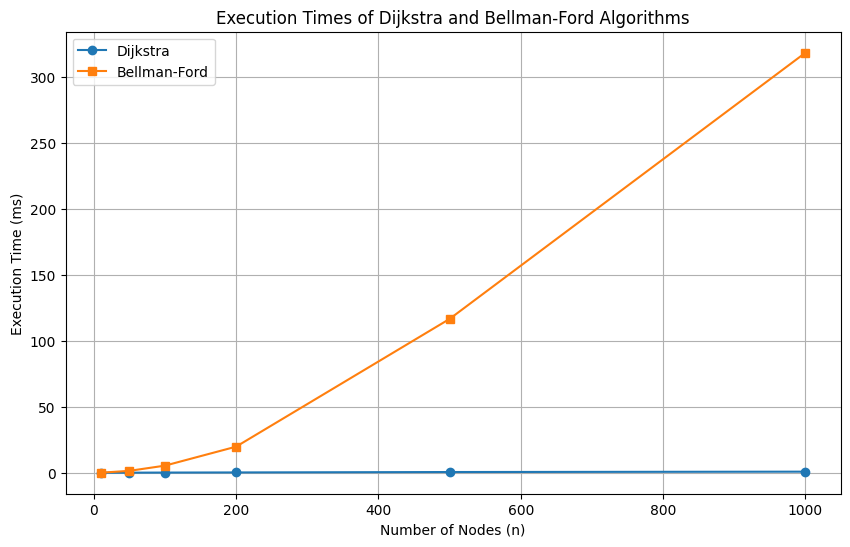

In [7]:
# Plot measured times
plt.figure(figsize=(10, 6))
plt.plot(graph_sizes, times_dijkstra, 'o-', label="Dijkstra")
plt.plot(graph_sizes, times_bellman, 's-', label="Bellman-Ford")

# Determine scaling factors using the smallest size (graph_sizes[0])
n0 = graph_sizes[0]
c1 = times_dijkstra[0] / (n0 * math.log(n0))
c2 = times_bellman[0] / (n0 ** 2)

plt.xlabel("Number of Nodes (n)")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Times of Dijkstra and Bellman-Ford Algorithms")
plt.legend()
plt.grid(True)
plt.show()

## Report table

In [12]:
import statistics


def count_edges(graph):
    """Zlicza wszystkie krawędzie w grafie w reprezentacji adjacency-list."""
    e = 0
    for node in graph:
        e += len(graph[node]) 
    return e

graph_sizes = [10, 50, 100, 200, 500, 1000]
num_runs = 10 # create statistics based on 10 runs

results = []
random.seed(42)

for n in graph_sizes:
    graph = generate_graph(n, extra_edges_multiplier=5)
    edges = count_edges(graph)
    source = 0
    
    dijkstra_times = []
    bellman_times = []
    
    for _ in range(num_runs):
        # Measure execution time for Dijkstra's algorithm
        start = time.perf_counter()
        dijkstra(graph, source)
        end = time.perf_counter()
        dijkstra_times.append((end - start) * 1000)  
        
        # Measure execution time for Bellman-Ford algorithm
        start = time.perf_counter()
        bellman_ford(graph, source)
        end = time.perf_counter()
        bellman_times.append((end - start) * 1000)
    
    dij_min = min(dijkstra_times)
    dij_max = max(dijkstra_times)
    dij_avg = statistics.mean(dijkstra_times)
    dij_std = statistics.pstdev(dijkstra_times) 

    bf_min = min(bellman_times)
    bf_max = max(bellman_times)
    bf_avg = statistics.mean(bellman_times)
    bf_std = statistics.pstdev(bellman_times)

    results.append([n, edges, "Dijkstra", dij_min, dij_max, dij_avg, dij_std])
    results.append([n, edges, "Bellman-Ford", bf_min, bf_max, bf_avg, bf_std])

df = pd.DataFrame(results, columns=[
    "Nodes", "Edges", "Algorithm", 
    "Min [ms]", "Max [ms]", "Avg [ms]", "Std [ms]"
])

df


,Nodes,Edges,Algorithm,Min [ms],Max [ms],Avg [ms],Std [ms]
0,10,50,Dijkstra,0.012166,0.023709,0.014437,0.003717
1,10,50,Bellman-Ford,0.054958,0.119625,0.062366,0.019116
2,50,250,Dijkstra,0.058541,0.080709,0.065837,0.008420
3,50,250,Bellman-Ford,1.219833,1.743833,1.323758,0.165296
4,100,500,Dijkstra,0.078417,0.225166,0.116496,0.039726
5,100,500,Bellman-Ford,3.106417,4.971416,3.915329,0.679366
6,200,1000,Dijkstra,0.134417,0.165959,0.147967,0.010085
7,200,1000,Bellman-Ford,10.749125,12.113542,11.026629,0.407403
8,500,2500,Dijkstra,0.402875,0.452500,0.414950,0.013268
9,500,2500,Bellman-Ford,78.786125,82.234000,79.792642,1.190246
